# Submission for RL Domain - Solving Black Jack
Submitted by Arsh Arora | BM22BTECH11004

I will be solving the Blackjack-v1 enviornment of Open AI Gym as instructed by the domain tasks given out earlier this month.

The link for the task is [here](https://www.gymlibrary.dev/environments/toy_text/blackjack/#blackjack)

## Importing Preliminary Packages and Libraries

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

## Initialising the enviornment

In [ ]:
env = gym.make("Blackjack-v1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Initialising Q Table and Returns Table.
I initialised the Q table and returns table according the parameters provided by OPen AI Gym, with an additional parameter for usable Aces, which they mention in their documentation as Aces hold values 1 or 11 depending on the need of the player

In [ ]:
q_table = np.zeros((32, 11, 2, 2))
return_table = np.zeros_like(q_table)

## Establishing Hyper Parameters

Upon close noticing, the reward factor did not change much over increment of nmber of episodes, while the gamma and decay rate gave best outputs when I set them to lower values.

In [ ]:
number_episodes = 100000
exploration_rate = 0.9
exploration_decay_rate = 0.001
gamma = 0.00001
alpha = 0.1
exploration_initial_eps = 1.0
trainReward = np.array([])
cumReward = np.array([])

## Writing the base code for Q Learning to solve the enviornment

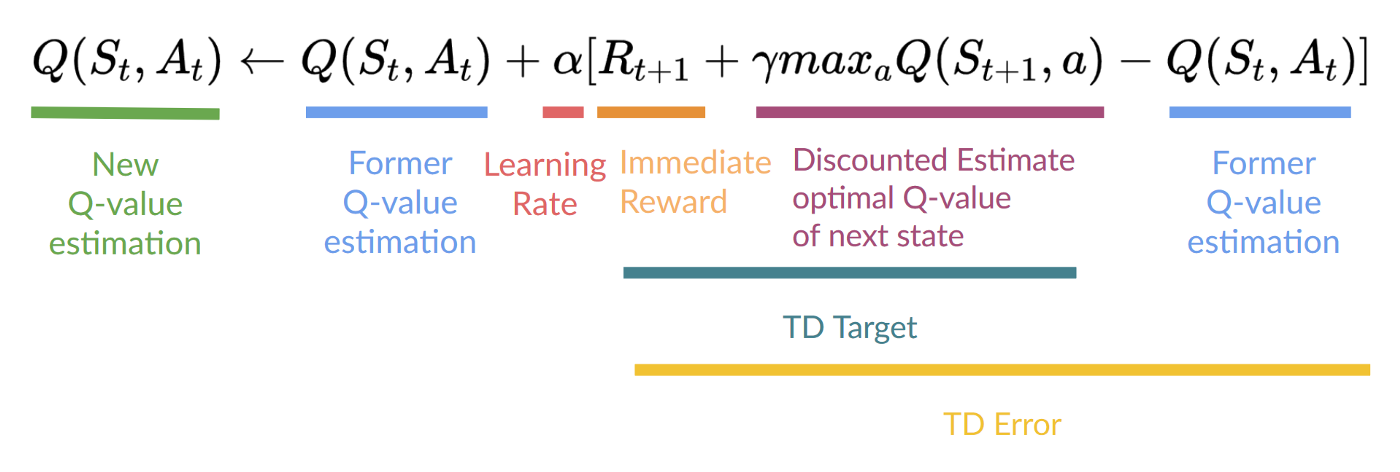

In [ ]:
max_wins = 0
best_table = np.zeros_like(q_table)
for episode in range(1,number_episodes+1):
  episode_states = []
  episode_reward = []
  episode_action = []

  state = env.reset()
  done = False

  while not done:
    player_sum, dealer_card, usable_ace = state
    player_sum -= 12
    dealer_card -= 1
    usable_ace = int(usable_ace)

    if np.random.rand() < exploration_rate:
      action = env.action_space.sample()
    else:
      action = np.argmax(q_table[player_sum, dealer_card, usable_ace, :])

    episode_states.append((player_sum, dealer_card, usable_ace))
    episode_action.append(action)

    next_state, reward, done, _ = env.step(action)
    episode_reward.append(reward)

    state = next_state

  cumReturn = 0
  trainReward = np.append(trainReward, np.sum(episode_reward))
  if episode % 100 == 0:
    cumReward = np.append(cumReward,np.sum(trainReward))
    trainReward = np.array([])
  if episode % 10000 == 0:
    print(episode)
  for t in reversed(range(len(episode_states))):
    player_sum, dealer_card, usable_ace = episode_states[t]
    action = episode_action[t]
    reward = episode_reward[t]

    cumReturn = reward + gamma * cumReturn

    return_table[player_sum, dealer_card, usable_ace, action] += 1
    q_table[player_sum, dealer_card, usable_ace, action] += alpha * ((cumReturn - q_table[player_sum, dealer_card, usable_ace, action]) / return_table[
            player_sum, dealer_card, usable_ace, action])

  exploration_rate = exploration_initial_eps * np.exp(-exploration_decay_rate*episode)
  #trainReward = np.append(trainReward ,reward)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


## Plotting cumulative rewards

To study the reward of the blackjack enviornment, we will be first slicing the reward array to get a jitter free output and then plot them out to ensure that the model is always learning positively

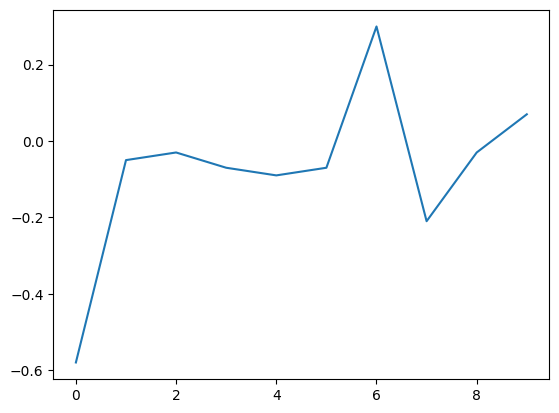

In [ ]:
plt.plot(cumReward[::100]/100)

## Testing parameters

We use the following code to test the model that is trained, however we simultaneously continue to establish a money factor, where we put up 10 bucks of our own per game, with a risk to either lose it or win 20. We start from 100 bucks and run till we either bust or we make 150 and cash out

In [ ]:
wins = 0
loss = 0
draw = 0
totalReward = 0
tlp = 0
rewards = np.array([])
for i in range(1000):
  money = 100
  while money > 50 and money < 150:
      state = env.reset()
      done = False
      while not done:
          player_sum, dealer_card, usable_ace = state
          player_sum -= 12
          dealer_card -= 1
          usable_ace = int(usable_ace)

          action = np.argmax(q_table[player_sum, dealer_card, usable_ace, :])

          next_state, reward, done, _ = env.step(action)

          state = next_state
      totalReward += reward
      rewards = np.append(rewards, reward)
      if reward == 1:
          wins += 1
          money += 10
      elif reward == -1:
          loss += 1
          money -= 10
      else:
          draw += 1
      if money == 150:
          tlp+=1

## Printing Outputs

In [ ]:
print("Number of times you won", tlp)
win_percentage = wins /(wins+loss+draw) * 100
loss_percentage = loss /(wins+loss+draw) * 100
draw_percentage = draw /(wins+loss+draw) * 100
print("Win Percentage: %.2f%%" % win_percentage)
print("Loss Percentage: %.2f%%" % loss_percentage)
print("Draw Percentage: %.2f%%" % draw_percentage)



Number of times you won 365
Win Percentage: 43.48%
Loss Percentage: 48.41%
Draw Percentage: 8.11%
